In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB14')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

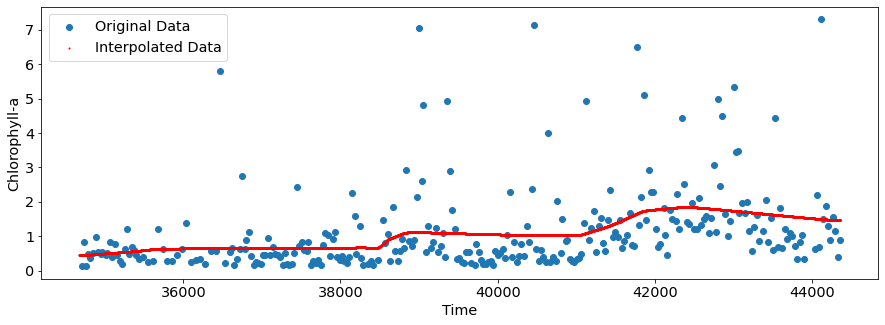

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB14.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.12
chlorophylla_max = 7.3
time_min = 34708
time_max = 44354.38542

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()

In [3]:
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.078682322
,0.084798602
,0.091122214
,0.097445827
,0.103769439
,0.110093051
,0.116520329
,0.122636609
,0.128960221
,0.138497473
,0.141607446
,0.147931058
,0.154358336
,0.160474616
,0.166798229
,0.173121841
,0.179445453
,0.185769065
,0.192196343
,0.375166432
,0.387709991
,0.394033603
,0.895775944
,0.95569476
,0.958804734
,0.962018373
])
interpolation

313/313 [==============================] - 0s 327us/step - loss: 6.0114e-17
['loss']


array([[0.06467202],
       [0.06671929],
       [0.06895579],
       [0.07119232],
       [0.07147123],
       [0.07148261],
       [0.07182738],
       [0.07219522],
       [0.07258655],
       [0.07315448],
       [0.07333969],
       [0.07371788],
       [0.073965  ],
       [0.07418028],
       [0.07440285],
       [0.07462543],
       [0.07481077],
       [0.07483308],
       [0.07485577],
       [0.07619289],
       [0.07482143],
       [0.08216984],
       [0.21450973],
       [0.19692731],
       [0.1960729 ],
       [0.19519004]], dtype=float32)